In [1]:
# Ejemplo del calculo que se hace en una neurona
import numpy as np
# definimos funcion de activación
def stepFunc(s, theta=1):
    m = s.size
    pred = np.zeros(m)
    for i in range (m):
        if s> theta:
            pred[i] = 1.
        if s <= theta:
            pred[i] = 0.
    return pred
# definimos otro ejemplo de función de activación
def hypertan(s=0.0):
    return np.tanh(s)

def neuron(func,W,X):
    s= np.sum(W*X) # W*X multiplica elemento a elemento los vectores = w1*x1+w2*x2
    pred = func(s)
    return pred


In [2]:
x1 = 0.9; x2 = 2.3
X=[x1,x2]
X = np.column_stack((x1,x2))
w1=1;w2=1
W =[w1,w2]
pred = neuron(hypertan,W,X) # escojo función de activación
pred

0.9966823978396512

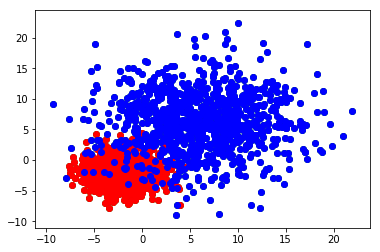

In [4]:
# Ejemplo de clasificación
data=np.loadtxt('ClassificationExample.txt')
X=data[:,1:]
y=data[:,0]  # la clase a la que pertenecen 0 clase= region roja , 1 clase = región azul
import matplotlib.pyplot as plt
colors = ['red', 'blue']
plt.scatter(X[:,0], X[:,1], c='g')
plt.scatter(X[y==1,0], X[y==1,1], c=colors[0]) # puedo escojer unos X que cumplan cierta condición
plt.scatter(X[y==0,0], X[y==0,1], c=colors[1])


In [15]:
# 2 funciones de esas muy simples que python nos hace
from sklearn.model_selection import train_test_split  # dividir training set entre set de train y de validación
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y)   # Xtrain=X[0:ntrain];X_test[ntrain:],...

# normalizamos inputs   (x-<x>)/sigma
scaler = StandardScaler()
scaler.fit(X_train)   # en scaler ahora tengo la media y la sigma guardada de cada elemento en X_train
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# luego hay que hacer la inversa! Comprobar como va de distinto si lo normalizo o no, para el vino es crucial! 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
from sklearn.neural_network import MLPClassifier
#help (MLPClassifier)


In [17]:
# definimos numero de capas ocultas y de hidden nodes, función de activación
# en este caso 2 capas una con 2 neuronas y otra con 5, función de activación tanh
mlp = MLPClassifier(hidden_layer_sizes=(2,5),activation='tanh',max_iter=500,batch_size=50,verbose=True) # batch_size default depending on minimizer

In [18]:
# Entreno con los valores que tengo en el train
# en mlp he definido mi ecuacion  y=tanh(sum(xw)+...)
# en fit hago el ajuste al igual que polyfit me hacía
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.32167287
Iteration 2, loss = 0.28893127
Iteration 3, loss = 0.26333163
Iteration 4, loss = 0.24238356
Iteration 5, loss = 0.22509090
Iteration 6, loss = 0.21063757
Iteration 7, loss = 0.19825563
Iteration 8, loss = 0.18780689
Iteration 9, loss = 0.17933139
Iteration 10, loss = 0.17198281
Iteration 11, loss = 0.16603734
Iteration 12, loss = 0.16137993
Iteration 13, loss = 0.15747832
Iteration 14, loss = 0.15422702
Iteration 15, loss = 0.15169183
Iteration 16, loss = 0.14956676
Iteration 17, loss = 0.14775878
Iteration 18, loss = 0.14631154
Iteration 19, loss = 0.14521236
Iteration 20, loss = 0.14407057
Iteration 21, loss = 0.14326368
Iteration 22, loss = 0.14256706
Iteration 23, loss = 0.14187491
Iteration 24, loss = 0.14145766
Iteration 25, loss = 0.14086978
Iteration 26, loss = 0.14055789
Iteration 27, loss = 0.14011779
Iteration 28, loss = 0.13988141
Iteration 29, loss = 0.13987743
Iteration 30, loss = 0.13927858
Iteration 31, loss = 0.13912189
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

Text(0,0.5,'loss function')

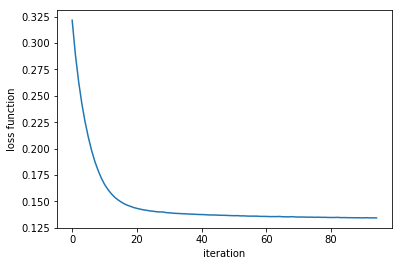

In [19]:
import matplotlib.pyplot as pl
pl.plot(mlp.loss_curve_)  # mlp.loss_curve nos da una idea de como converge el training set
pl.xlabel('iteration')
pl.ylabel('loss function')





In [20]:
from sklearn.metrics import confusion_matrix
# una vez terminado el fit tenemos los pesos. Tenemos el MODELO que ajusta los datos
predictions = mlp.predict(X_test)


In [21]:
# comparamos los datos del test (lo que no hemos usado para el training) con las predicciones
confusion_matrix(y_test,predictions)  # nos dice los aciertos en cada clase y los falsos positivos por columnas >> C_ii true positives, C_ij!=0 falso positivo detectado en clase j

array([[231,  22],
       [  6, 241]])

In [22]:
from sklearn.metrics import classification_report
# calculamos recall, precision y f1-score para ambas clases. 
print classification_report(y_test,predictions)

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       253
         1.0       0.92      0.98      0.95       247

   micro avg       0.94      0.94      0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



Este resultado indica que :
Cl


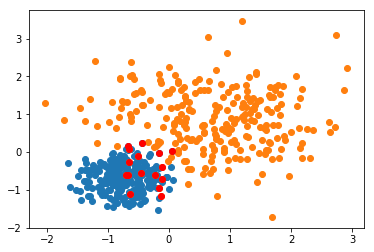

In [14]:
# hacemos plot de nuestras predicciones y marcamos en rojo los puntos que no hemos clasificado bien

plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1])
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1])
plt.scatter(X_test[(y_test==1)&(predictions==0),0],X_test[(y_test==1)&(predictions==0),1],c='r')
plt.scatter(X_test[(y_test==0)&(predictions==1),0],X_test[(y_test==0)&(predictions==1),1],c='r')
# mal clasificados del test en rojo